In [ ]:
import yfinance as yf
import os

# Create the directory if it doesn't exist
if not os.path.exists("data"):
    os.makedirs("data")

# Unduh data BTC
btc = yf.download("BTC-USD", start="2020-01-01", end="2024-12-31")
btc.to_csv("data/bitcoin_price.csv")
btc.head()

/tmp/ipython-input-15-2762587046.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [ ]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2020-01-01 to 2024-12-30
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   1826 non-null   float64
 1   (High, BTC-USD)    1826 non-null   float64
 2   (Low, BTC-USD)     1826 non-null   float64
 3   (Open, BTC-USD)    1826 non-null   float64
 4   (Volume, BTC-USD)  1826 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 85.6 KB


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imadallal/sentiment-analysis-of-bitcoin-news-2021-2024")

print("Path to dataset files:", path)



Path to dataset files: /kaggle/input/sentiment-analysis-of-bitcoin-news-2021-2024


100%|██████████| 105k/105k [00:00<00:00, 50.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ffejgnaw/bitcoin-news-june-2020-onwards/versions/3


In [ ]:

# Download latest version
path = kagglehub.dataset_download("ffejgnaw/bitcoin-news-june-2020-onwards")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/bitcoin-news-june-2020-onwards


In [ ]:
import pandas as pd
data = pd.read_csv("/content/bitcoin_sentiments_21_24.csv")
data.head()


,Date,Short Description,Accurate Sentiments
0,2021-11-05 04:42:00,Bitcoin price is consolidating near the USD 62...,0.998558
1,2021-11-05 08:15:00,Congress could finally approve or reject the m...,0.000000
2,2021-11-05 10:24:00,Bitcoin increasingly becoming a political inst...,0.000000
3,2021-11-05 16:58:00,There is still potential for the price of bitc...,0.999458
4,2021-11-05 21:00:00,'Several companies' are looking to Latin Ameri...,0.000000


In [ ]:
import pandas as pd
news = pd.read_csv("/content/news.csv")
news.head()


,URL,Name,Desc,Date,Unnamed: 4
0,b'https://infosurhoy.com/news/ethereum-price-t...,"b'Ethereum Price Tumbles, Grayscale Ethereum ...",b'A bear trap at $250 caught buyers by surpri...,b'2020-06-28T00:04:00.0000000Z',NaN
1,b'http://global.chinadaily.com.cn/a/202006/27/...,"b""China's Ebang International Holdings makes ...","b'Ebang International Holdings, which makes e...",b'2020-06-27T23:28:00.0000000Z',NaN
2,b'http://nsjonline.com/article/2020/06/lobbyis...,b'Lobbyist Abramoff charged in cryptocurrency...,"b'SAN FRANCISCO \xe2\x80\x94 Jack Abramoff, a...",b'2020-06-27T23:16:00.0000000Z',NaN
3,b'https://insidebitcoins.com/news/bitcoin-pric...,b'Bitcoin Price Prediction: Downtrend Continu...,"b'After a long battle to maintain the $9,000 ...",b'2020-06-27T23:08:00.0000000Z',NaN
4,b'https://themerkle.com/this-bitcoin-transfer-...,b'This Bitcoin Transfer has Just $0.48 in Tra...,b'Bitcoin often faces a lot of criticism for ...,b'2020-06-27T22:21:00.0000000Z',NaN


In [ ]:
import pandas as pd

# Reset index dan ubah nama kolom
btc = btc.reset_index()

# Ubah nama kolom biar bersih
btc.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Pastikan format datetime
btc['Date'] = pd.to_datetime(btc['Date'])

# Simpan file bersih
btc.to_csv("btc_clean.csv", index=False)
btc.head()



,Date,Close,High,Low,Open,Volume
0,2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
1,2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2,2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
3,2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
4,2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [ ]:
# Load kembali data sentimen harian
sentiment = pd.read_csv("bitcoin_sentiments_21_24.csv")
sentiment['Date'] = pd.to_datetime(sentiment['Date'])
sentiment['Date'] = sentiment['Date'].dt.date
sentiment = sentiment.groupby('Date')['Accurate Sentiments'].mean().reset_index()
sentiment['Date'] = pd.to_datetime(sentiment['Date'])

# Gabung dengan harga BTC
btc_sentiment = pd.merge(btc, sentiment, on='Date', how='left')
btc_sentiment.head()


,Date,Close,High,Low,Open,Volume,Accurate Sentiments
0,2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,NaN
1,2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,NaN
2,2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,NaN
3,2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,NaN
4,2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,NaN


In [ ]:
# Tambahkan SMA 7 dan 21 hari
btc_sentiment['SMA_7'] = btc_sentiment['Close'].rolling(window=7).mean()
btc_sentiment['SMA_21'] = btc_sentiment['Close'].rolling(window=21).mean()

# Tambahkan EMA
btc_sentiment['EMA_7'] = btc_sentiment['Close'].ewm(span=7, adjust=False).mean()

# Tambahkan Return Harian
btc_sentiment['Daily_Return'] = btc_sentiment['Close'].pct_change()

# Tambahkan RSI (Relative Strength Index)
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

btc_sentiment['RSI_14'] = compute_rsi(btc_sentiment['Close'])


In [ ]:
btc_sentiment.to_csv("btc_final_dataset.csv", index=False)
data2 = pd.read_csv("btc_final_dataset.csv")
data2.head()

,Date,Close,High,Low,Open,Volume,Accurate Sentiments,SMA_7,SMA_21,EMA_7,Daily_Return,RSI_14
0,2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,NaN,NaN,NaN,7200.174316,NaN,NaN
1,2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,NaN,NaN,NaN,7146.498291,-0.029819,NaN
2,2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,NaN,NaN,NaN,7196.094788,0.051452,NaN
3,2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,NaN,NaN,NaN,7249.735275,0.008955,NaN
4,2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,NaN,NaN,NaN,7290.130802,0.000089,NaN


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load dataset akhir
df = pd.read_csv("btc_final_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Drop baris awal yang masih banyak NaN (indikator teknikal)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Pilih fitur yang akan dipakai
features = ['Open', 'High', 'Low', 'Close', 'Volume',
            'SMA_7', 'SMA_21', 'EMA_7', 'Daily_Return', 'RSI_14', 'Accurate Sentiments']
target = 'Close'

# Normalisasi
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

# Simpan target sebenarnya (untuk pembanding)
actual_close = df['Close'].values


In [ ]:
# Membentuk window sequence: prediksi 1 hari ke depan
def create_sequences(data, lookback=60):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i])
        y.append(data[i, 3])  # kolom indeks 3 = 'Close'
    return np.array(X), np.array(y)

lookback = 60
X, y = create_sequences(scaled_data, lookback)

# Split train/test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output: prediksi harga

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,545 (205.25 KB)

 Trainable params: 52,545 (205.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - loss: 0.0155 - val_loss: 0.0242
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0024 - val_loss: 0.0088
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0018 - val_loss: 0.0223
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0020 - val_loss: 0.0145
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0015 - val_loss: 0.0263
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0016 - val_loss: 0.0083
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0013 - val_loss: 0.0113
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0012 - val_loss: 0.0108
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0013 - val_loss: 0.0060
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0011 - val_loss: 0.0073
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.0011 - val_loss: 0.0075
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 

In [ ]:
close_index = features.index('Close')  # posisi kolom Close dalam array fitur


In [ ]:
# Buat dummy array sama panjang dengan jumlah fitur
dummy = np.zeros((len(y_pred), len(features)))

# Masukkan hasil prediksi di kolom 'Close' (bukan di kolom terakhir!)
dummy[:, close_index] = y_pred.flatten()

# Inverse transform
predicted_close = scaler.inverse_transform(dummy)[:, close_index]


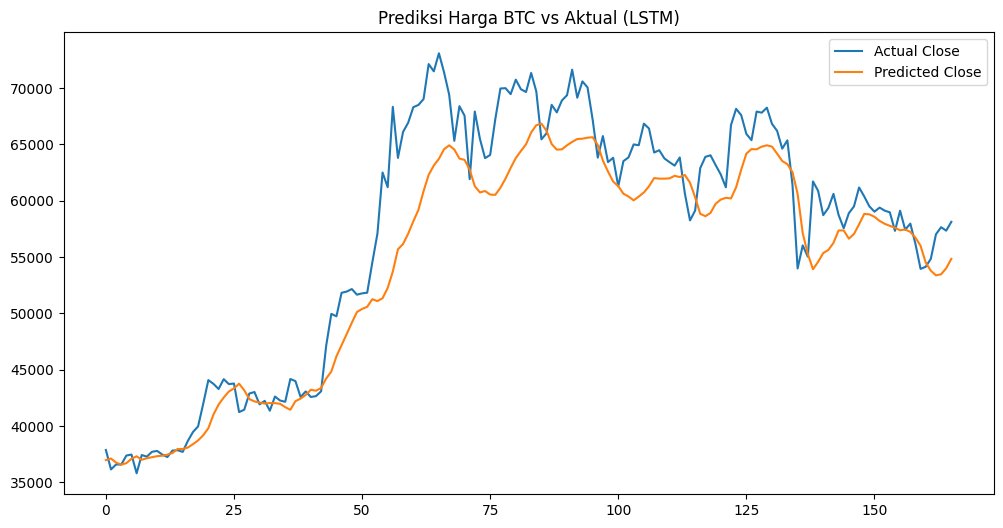

In [ ]:
actual_close_test = actual_close[lookback + split:]

# Plot ulang
plt.figure(figsize=(12,6))
plt.plot(actual_close_test, label="Actual Close")
plt.plot(predicted_close, label="Predicted Close")
plt.title("Prediksi Harga BTC vs Aktual (LSTM)")
plt.legend()
plt.show()
